In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib import cm

<h4>2D Gaussian Kernel </h4>

[[0.01076964 0.02279933 0.02927492 0.02279933 0.01076964]
 [0.02279933 0.04826618 0.061975   0.04826618 0.02279933]
 [0.02927492 0.061975   0.07957747 0.061975   0.02927492]
 [0.02279933 0.04826618 0.061975   0.04826618 0.02279933]
 [0.01076964 0.02279933 0.02927492 0.02279933 0.01076964]]


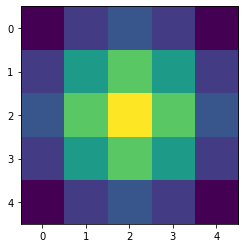

In [2]:
sigma_square=2
x,y = np.meshgrid(np.linspace(-2,2,5), np.linspace(-2,2,5))
gaus = (1/(2*sigma_square*np.pi))*(np.exp(-(x**2+y**2)/(2*sigma_square)))
print(gaus)
plt.imshow(gaus)

<h4>Open grass.png </h4>

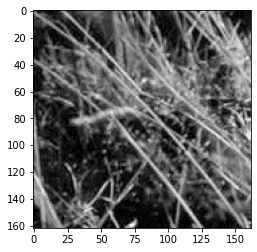

In [3]:
image=cv2.imread('grass.png')
plt.imshow(image)

<h4> Convolve the kernel with the grass.png </h4>

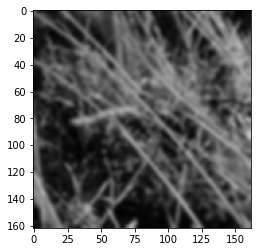

In [4]:
#Filtre simetrik olduğu için flip işlemine gerek yoktur
convolved_image=cv2.filter2D(image,-1,gaus)
plt.imshow(convolved_image)

<h4> 1D Gaussian Kernel </h4>

In [5]:
sigma=1
x_2 = np.linspace(-2,2,5)
gaus_1d = (1/(np.sqrt(2*np.pi)*sigma))*(np.exp(-(x_2**2)/(2*sigma)))
#seperate matrices
x_matrix=np.matrix(gaus_1d) 
y_matrix=np.transpose(x_matrix)
print(x_matrix)
print(y_matrix)
c=y_matrix.dot(x_matrix) #product of 2 matrices
print(c)

[[0.05399097 0.24197072 0.39894228 0.24197072 0.05399097]]
[[0.05399097]
 [0.24197072]
 [0.39894228]
 [0.24197072]
 [0.05399097]]
[[0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.02153928 0.09653235 0.15915494 0.09653235 0.02153928]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]]


<h4>Convolve the original image with 2 seperate matrices </h4>

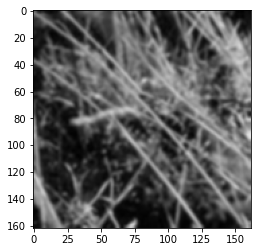

In [6]:
convolved_image2=cv2.filter2D(image,-1,x_matrix)
convolved_image2=cv2.filter2D(convolved_image2,-1,y_matrix)
plt.imshow(convolved_image2)

<h4> Convolve the original image with 2D matrix </h4>

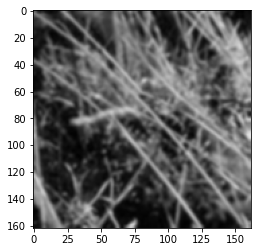

In [7]:
convolved_image3=cv2.filter2D(image,-1,c)
plt.imshow(convolved_image3)

Results of seperable convolution and 2D  convolution images are equal since Gaussian filter is seperable.

<h4>Ceate an artificial image of 41x41, all zero, </h4>

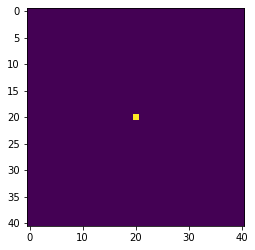

In [8]:
s=(41,41)
arr=np.zeros(s)
np.put(arr,arr.size//2,1)
plt.imshow(arr)

<h4>Convolve array with 2 seperate matrices </h4>

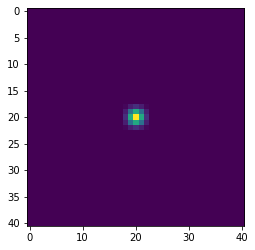

In [9]:
convolved_image4=cv2.filter2D(arr,-1,x_matrix)
convolved_image4=cv2.filter2D(convolved_image4,-1,y_matrix)
plt.imshow(convolved_image4)

<h4> Colvolve array with 2D matrix </h4>

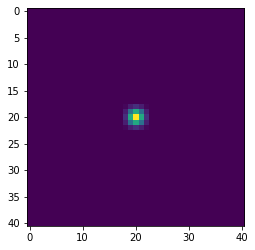

In [10]:
convolved_image5=cv2.filter2D(arr,-1,c)
plt.imshow(convolved_image5)

Result of seperable convolution and 2D convolution is same.

<h4>See your kernels in 3 dimensions </h4>

3d kernel when sigma_squre=2

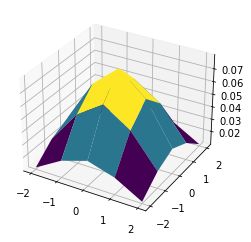

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(x,y,gaus,cmap=cm.viridis)
plt.show()

3d kernel when sigma=1

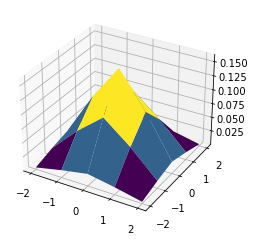

In [12]:
x3,y3 = np.meshgrid(np.linspace(-2,2,5), np.linspace(-2,2,5))
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(x3,y3,c,cmap=cm.viridis) #c(defined above) is gaussian kernel with sigma=1 
plt.show()